#Importing Necessary Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Reading the data

In [2]:
# Loading the dataset
df = pd.read_csv("loan_data.csv")

# Displaying the first 5 rows of the DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
# Getting the shape of the DataFrame
rows, columns = df.shape

# Printing the number of rows and columns
print(f'\nThe Loan data Dataset has {rows} rows and {columns} columns')


The Loan data Dataset has 381 rows and 13 columns


In [4]:
# Dropping the Loan_ID column from the DataFrame
df = df.drop(columns=['Loan_ID'])

* In the data preprocessing phase, columns with unique identifiers such as Loan_ID are usually excluded from the dataset.
* Retaining these columns can introduce unnecessary noise or bias into the model, so they are omitted to maintain the precision of the analysis.

In [5]:
print('\nProportion of value counts in categorical columns (in percentage)')

# Iterating through each categorical column in the DataFrame
for cols in df.select_dtypes(include='object').columns:
    # Calculating the proportion of each value, converting to percentage, and rounding to 2 decimal places
    proportions = df[cols].value_counts(normalize=True).mul(100).round(2)
    # Printing the column name and the calculated proportions
    print(f'\n{cols}\n{proportions}')



Proportion of value counts in categorical columns (in percentage)

Gender
Gender
Male      77.39
Female    22.61
Name: proportion, dtype: float64

Married
Married
Yes    59.84
No     40.16
Name: proportion, dtype: float64

Dependents
Dependents
0     62.73
2     15.82
1     13.94
3+     7.51
Name: proportion, dtype: float64

Education
Education
Graduate        72.97
Not Graduate    27.03
Name: proportion, dtype: float64

Self_Employed
Self_Employed
No     90.28
Yes     9.72
Name: proportion, dtype: float64

Property_Area
Property_Area
Semiurban    39.11
Urban        33.07
Rural        27.82
Name: proportion, dtype: float64

Loan_Status
Loan_Status
Y    71.13
N    28.87
Name: proportion, dtype: float64


Based on the given proportions in the categorical columns of the loan_data dataset, several conclusions can be drawn:

1. **Gender Distribution:** There is a significant gender disparity among applicants, with more males applying for loans.
2. **Marital Status:** A larger portion of applicants are married, which could indicate marital status as a factor in loan application.
3. **Dependents:** The majority of applicants have no dependents, which might influence their financial stability and loan eligibility.
4. **Education:** Being a graduate appears to be common among applicants, possibly reflecting better financial literacy or higher income levels.
5. **Employment:** Most applicants are not self-employed, suggesting that regular employment might be more favorable for loan approval.
6. **Property Area:** There is a reasonable spread of applicants across different property areas, which could influence the types of loans being applied for.
7. **Loan Status:** With a high approval rate, the criteria for loan approval might be relatively accessible, or the applicants are generally well-qualified.


In [6]:
# Getting the descriptive statistics for categorical columns, excluding numerical columns
categorical_describe = df.describe(exclude=np.number)

# Printing the descriptive statistics for categorical columns
print(categorical_describe)

       Gender Married Dependents Education Self_Employed Property_Area  \
count     376     381        373       381           360           381   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      291     228        234       278           325           149   

       Loan_Status  
count          381  
unique           2  
top              Y  
freq           271  


* count: Number of non-null entries in each column.

* unique: Number of unique categories in each column.

* top: Most frequent category in each column.

* freq: Frequency of the most frequent category.

This information provides a quick overview of the categorical data, helping to understand its structure and identify any predominant categories.








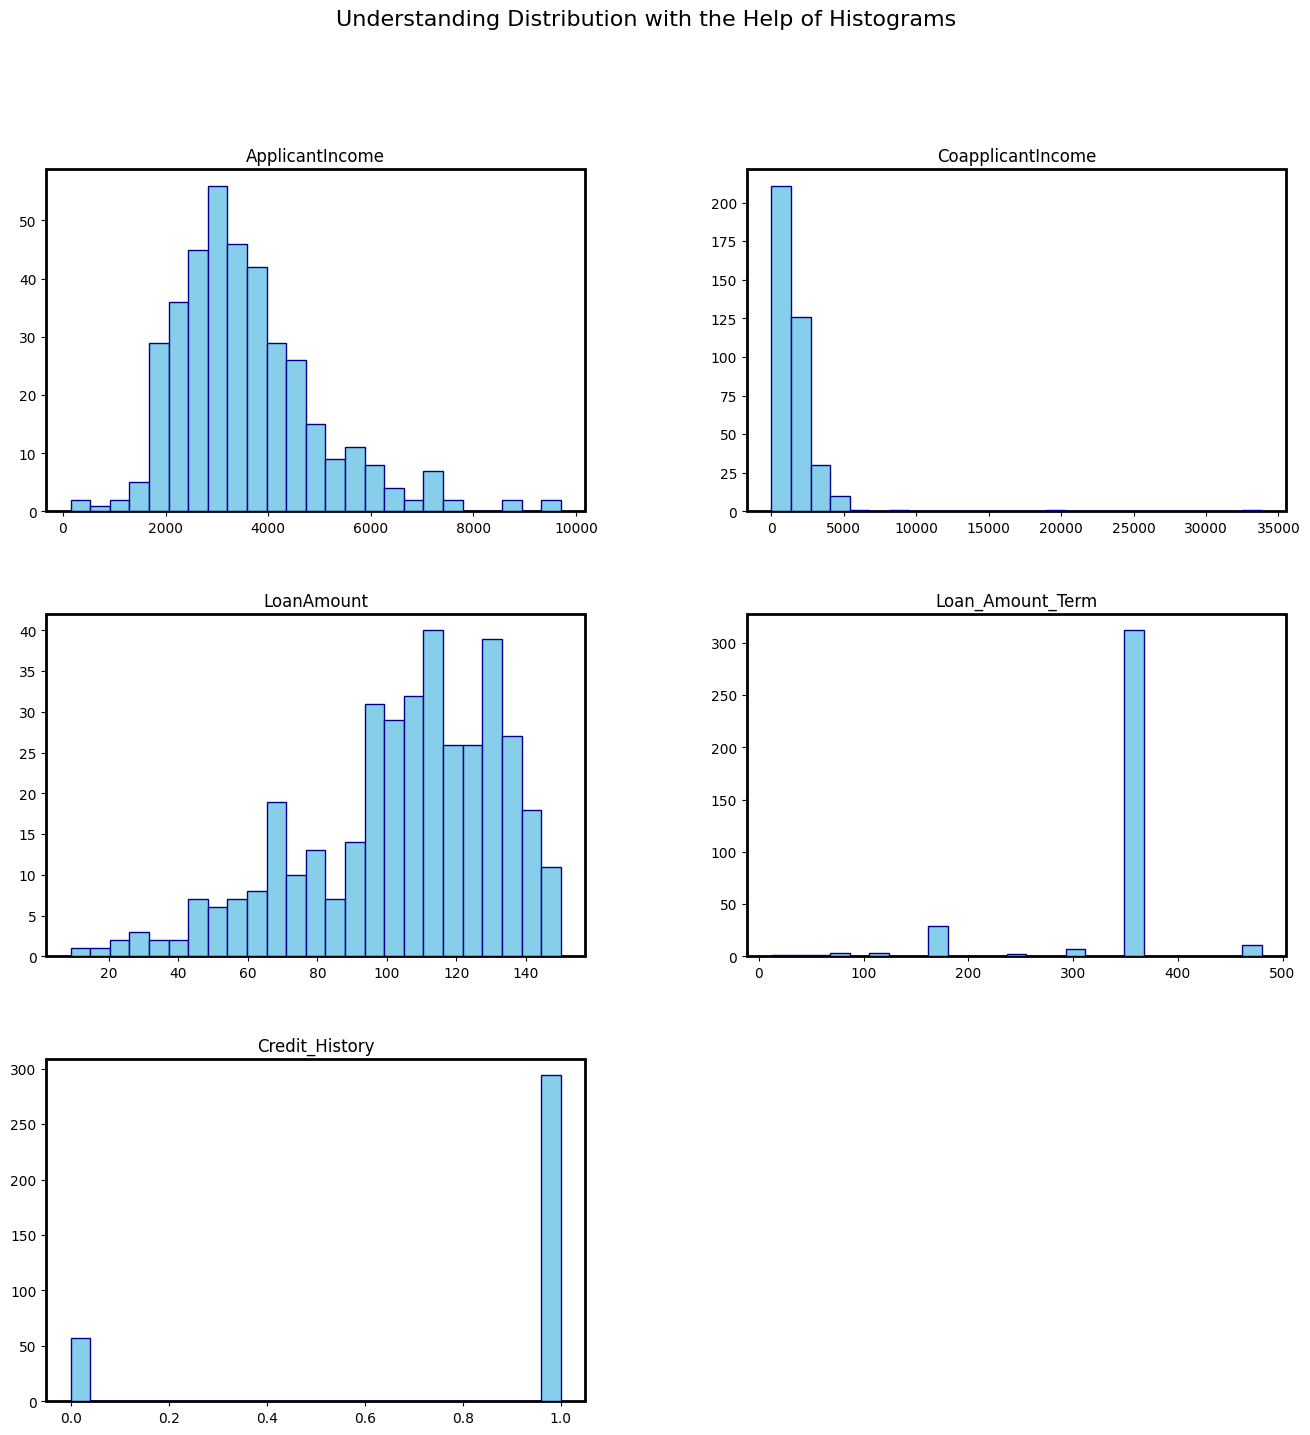

In [7]:
# Creating histograms for all numerical columns in the DataFrame
fig = df.hist(figsize=(16, 16), bins=25, color='skyblue', edgecolor='darkblue', grid=False)

# Setting a title for the entire figure
plt.suptitle('Understanding Distribution with the Help of Histograms', fontsize=16)

# Adding a border to the entire figure
for ax in fig.flatten():
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(2)

# Displaying the histograms
plt.show()


### General Conclusions:

1. **Income Disparity:** There is a noticeable disparity in both applicant and coapplicant incomes, with most coapplicants having little to no income, highlighting single-income households.
2. **Loan Amount Preference:** Most applicants tend to apply for moderate loan amounts, with a peak in the 100 to 150 range.
3. **Loan Term:** The majority of loans are structured for a long-term repayment period of 30 years, which is typical for housing loans.
4. **High Credit History Scores:** Most loan applicants have a credit history score of 1, which typically indicates that they have a good credit history. This suggests that applicants with a strong credit history are more likely to apply for loans.


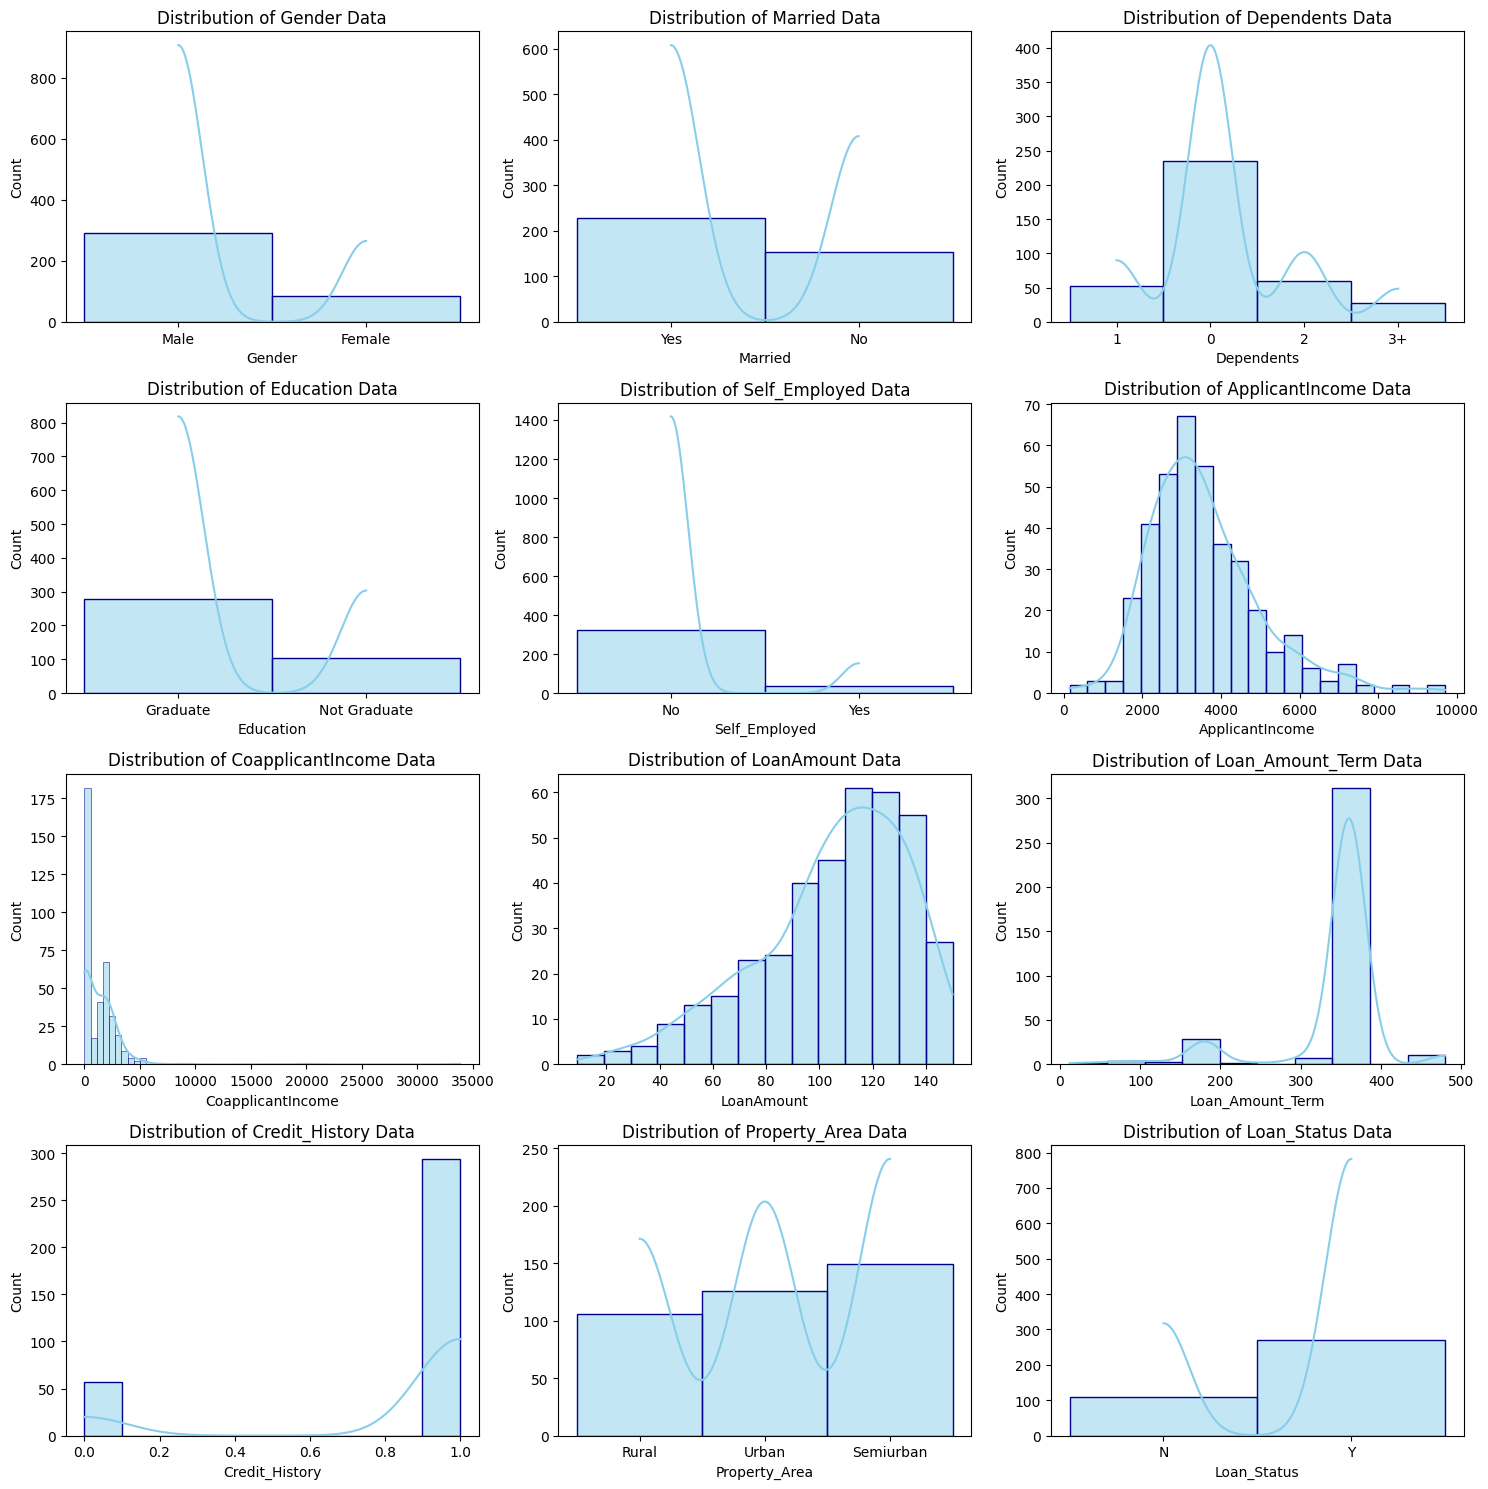

In [8]:
# Creating a figure with a specified size
plt.figure(figsize=(15, 15))

# Iterating over each column and create a subplot for each
for i, col in enumerate(df.columns, 1):
    # Creating subplots in a 4x3 grid
    plt.subplot(4, 3, i)
    # Creating histogram with KDE
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='darkblue')
    plt.title(f"Distribution of {col} Data")
# Adjusting the layout to avoid overlap
plt.tight_layout()

# Displaying the plot
plt.show()



### General Conclusions:
1. **Demographic Insights:** The data is predominantly comprised of male, married, graduate applicants, most of whom are not self-employed.
2. **Income Insights:** Applicant incomes show a wide range, with coapplicant incomes generally being low.
3. **Loan Preferences:** Most applicants seek moderate loan amounts with long-term repayment plans.
4. **Creditworthiness:** A high percentage of applicants have good credit histories, which likely contributes to the high loan approval rate.
5. **Geographical Spread:** There is a balanced distribution of applicants across different property areas.


In [9]:
# List of columns to exclude
excluded_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Identifying categorical columns by excluding the specified numerical columns
cat_col = [col for col in df.columns if col not in excluded_cols]

# Displaying the list of categorical columns
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [10]:
# Calculating the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100

# Rounding the percentages to two decimal places
missing_percentage_rounded = missing_percentage.round(2)

# Printing the rounded percentages of missing values
print(missing_percentage_rounded)


Gender               1.31
Married              0.00
Dependents           2.10
Education            0.00
Self_Employed        5.51
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     2.89
Credit_History       7.87
Property_Area        0.00
Loan_Status          0.00
dtype: float64


In [11]:
# Calculating the number of duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()

# Printing the number of duplicate rows
print(f'Number of duplicate rows: {num_duplicates}')


Number of duplicate rows: 0


In [12]:
# Calculating the normalized value counts for the Loan_Amount_Term column
loan_amount_term_distribution = df["Loan_Amount_Term"].value_counts(normalize=True)

# Printing the normalized value counts
print(loan_amount_term_distribution)


Loan_Amount_Term
360.0    0.843243
180.0    0.078378
480.0    0.029730
300.0    0.018919
120.0    0.008108
84.0     0.008108
240.0    0.005405
60.0     0.002703
12.0     0.002703
36.0     0.002703
Name: proportion, dtype: float64


It concludes approximately 84.32% of the loan terms are 360 months (or 30 years). This indicates a strong preference for long-term loans among the applicants.

In [13]:
# Calculating the frequency of each unique value in the 'LoanAmount' column
loan_amount_counts = df["LoanAmount"].value_counts()

# Printing the frequency of each unique value in the 'LoanAmount' column
print(loan_amount_counts)

LoanAmount
120.0    19
110.0    16
100.0    15
128.0    11
113.0    11
         ..
59.0      1
63.0      1
101.0     1
48.0      1
40.0      1
Name: count, Length: 101, dtype: int64


* Common Loan Amounts:
  * Certain loan amounts like 120.0, 110.0, and 100.0 are more frequent, suggesting that these are standard loan amounts that applicants commonly request.
* Variety in Loan Amounts:
  * There is a significant variety in the loan amounts, with many unique values occurring only once. This indicates that the loan amounts are quite diverse, possibly tailored to specific needs or financial situations.
* Loan Amount Preferences:
  * The higher frequency of certain loan amounts might indicate popular choices or standard loan packages offered by the lender.


#Cleaning Process

**Based on our assessment, we need to:**

1. Fill the missing values in the columns Gender, Dependents, Self_Employed, Loan_Amount_Term, and Credit_History with their respective mode values.

2. Convert some categorical features into binary values, specifically for the columns Gender, Married, Education, Self_Employed, and Loan_Status.

3. Modify the representation of the Loan_Amount_Term column: if the value is 360 or greater, set it to 1; if it is less than 360, set it to 0. This is because 84% of the values are 360.

4. Adjust the LoanAmount column to accurately represent the amounts in thousands by multiplying all values by 1000, as it currently appears that a value like 3 actually means 3000.

5. Rename the Education column to Graduated and the Loan_Amount_Term column to Long_Term for better clarity.


In [14]:
# Multiplying the values in the "LoanAmount" column by 1000 to convert them from thousands to actual currency amounts
df["LoanAmount"] = df["LoanAmount"] * 1000
df["ApplicantIncome"] = df["ApplicantIncome"] * 1000
df["CoapplicantIncome"] = df["CoapplicantIncome"] * 1000

#Filling Missing Values

In [15]:
# Defining a list of columns to fill null values with mode
columns_to_fill = ['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

# Iterating over each column in the list
for col in columns_to_fill:
    # Checking if the column has any null values
    if df[col].isnull().any():
        # If null values exist, filling them with the mode value of that column
        df[col].fillna(df[col].mode()[0], inplace=True)


In [16]:
df.isnull().any()

,0
Gender,False
Married,False
Dependents,False
Education,False
Self_Employed,False
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,False
Loan_Amount_Term,False
Credit_History,False


In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583000,1508000.0,128000.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000000,0.0,66000.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583000,2358000.0,120000.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000000,0.0,141000.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333000,1516000.0,95000.0,360.0,1.0,Urban,Y


In [18]:
# Converting "Gender" column to binary: 1 for male, 0 for female, and NaN for missing values
df["Gender"] = np.where((df["Gender"] == "Male"), 1, 0)

# Converting "Married" column to binary: 1 for married, 0 for unmarried
df["Married"] = np.where((df["Married"] == "Yes"), 1, 0)

# Converting "Education" column to binary: 1 for graduate, 0 for non-graduate
df["Education"] = np.where((df["Education"] == "Graduate"), 1, 0)

# Converting "Self_Employed" column to binary: 1 for self-employed, 0 for not self-employed, and NaN for missing values
df["Self_Employed"] = np.where((df["Self_Employed"] == "Yes"), 1, 0)

# Converting "Loan_Status" column to binary: 1 for approved, 0 for not approved
df["Loan_Status"] = np.where((df["Loan_Status"] == "Y"), 1, 0)

df["Property_Area"]=np.where((df["Property_Area"]=="Urban"),2,np.where((df["Property_Area"]=="Semiurban"),1,0))

df["Credit_History"]=np.where((df["Credit_History"]==1.0),1,0)

In [19]:
df["Dependents"]=df["Dependents"].replace({"3+":3})

In [20]:
# Converting "Loan_Amount_Term" column to binary: 1 for terms greater than or equal to 360 months (30 years), 0 otherwise, and NaN for missing values
df["Loan_Amount_Term"] = np.where((df["Loan_Amount_Term"] >= 360), 1, 0)

In [21]:
# Renaming the columns "Loan_Amount_Term" to "Long_term" and "Education" to "Graduated"
df.rename(columns={"Loan_Amount_Term": "Long_term", "Education": "Graduated"}, inplace=True)

In [22]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583000,1508000.0,128000.0,1,1,0,0
1,1,1,0,1,1,3000000,0.0,66000.0,1,1,2,1
2,1,1,0,0,0,2583000,2358000.0,120000.0,1,1,2,1
3,1,0,0,1,0,6000000,0.0,141000.0,1,1,2,1
4,1,1,0,0,0,2333000,1516000.0,95000.0,1,1,2,1


In [23]:
# Calculating the quantiles for specified columns
quantile = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].quantile([0.25, 0.5, 0.75])

# Loop through each specified column to identify and remove outliers
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    # Calculating the lower and upper bounds for outliers
    q1 = quantile[col][0.25] - 1.5 * (quantile[col][0.75] - quantile[col][0.25])
    q2 = quantile[col][0.75] + 1.5 * (quantile[col][0.75] - quantile[col][0.25])

    # Identifying the index of outliers
    outlier_index = df[(df[col] < q1) | (df[col] > q2)].index

    # Dropping the outliers from the DataFrame
    df.drop(outlier_index, axis=0, inplace=True)


#Exploratory Data Analysis

In [24]:
def crosstab_heatmap(col):
    plt.figure(facecolor='lightgrey')

    # Creating a crosstab of Loan_Status and the given column
    corr = pd.crosstab(df['Loan_Status'], col)

    # Calculating the percentage distribution
    percentage = corr.div(corr.sum(axis=1), axis=0) * 100

    # Creating a heatmap with annotations, a different color map, and borders
    sns.heatmap(percentage, cmap='BuPu', annot=True, fmt=".2f", square=True,
                cbar_kws={'shrink': 0.5}, linewidths=1, linecolor='grey')

    # Setting the axis labels
    plt.xlabel(f'{col.name} (in %)', fontsize=14)
    plt.ylabel('Loan Status (in %)', fontsize=14)

    # Showing the plot
    plt.show()


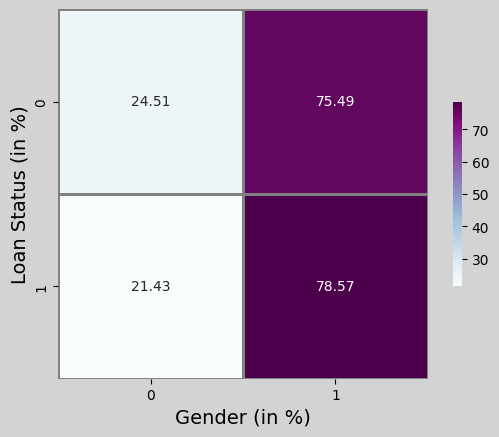

In [25]:
crosstab_heatmap(df['Gender'])

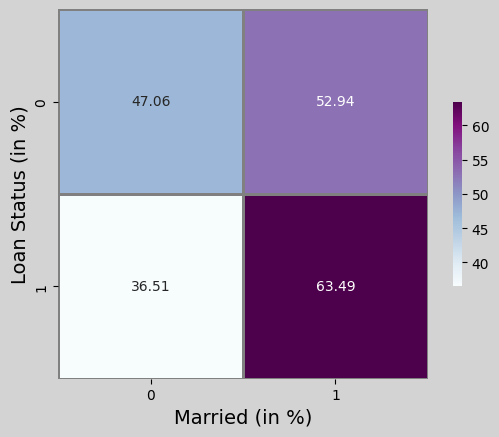

In [26]:
crosstab_heatmap(df['Married'])

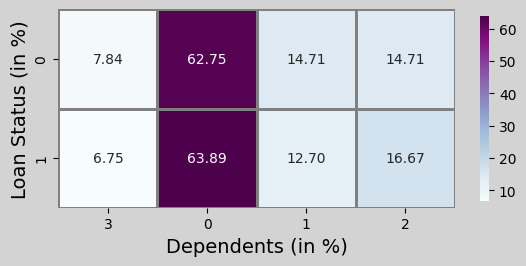

In [27]:
crosstab_heatmap(df['Dependents'])

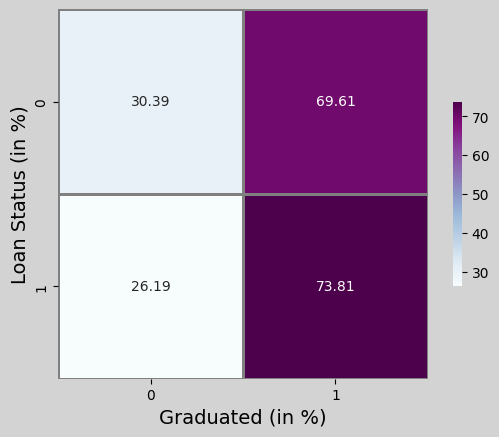

In [28]:
crosstab_heatmap(df['Graduated'])

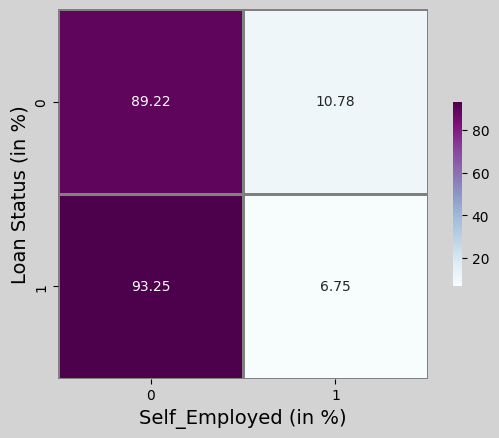

In [29]:
crosstab_heatmap(df['Self_Employed'])

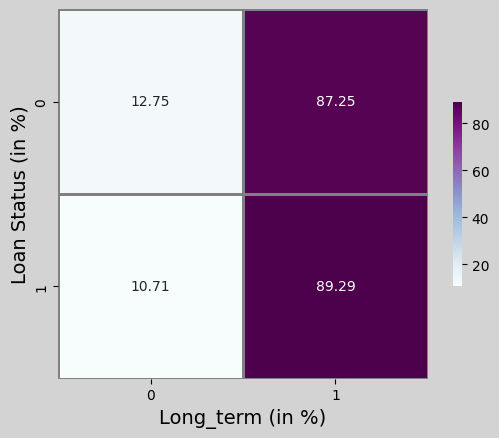

In [30]:
crosstab_heatmap(df['Long_term'])

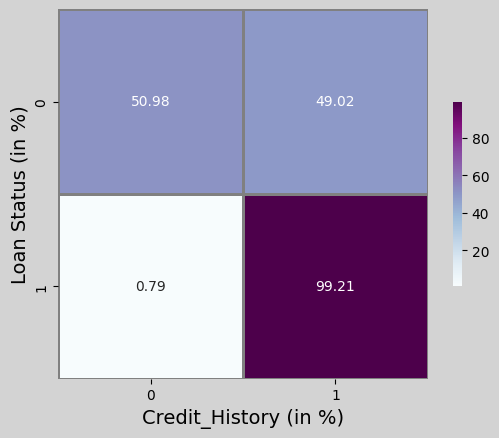

In [31]:
crosstab_heatmap(df['Credit_History'])

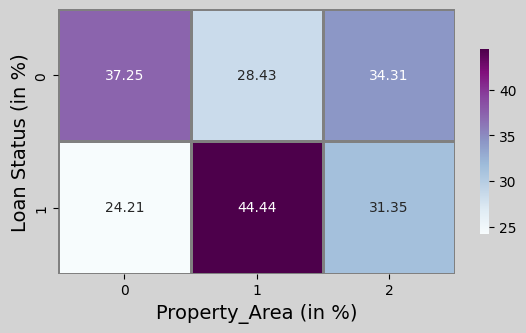

In [32]:
crosstab_heatmap(df['Property_Area'])

**From previous analyses, we can deduce that:**

1. Males are more likely to repay their loans compared to females.
2. Married individuals are more likely to repay their loans than those who are not married.
3. Graduates have a higher loan repayment rate compared to non-graduates.
4. Self-employed individuals are less likely to repay their loans compared to those who are not self-employed.
5. Long-term loans are more likely to be repaid than short-term loans.
6. People with a strong credit history are significantly more likely to repay their loans than those with a weak credit history. This is a strong factor.
7. Semiurban residents are more likely to repay their loans than urban residents, with rural residents being the least likely.
8. Individuals with 2 dependents are more likely to repay their loans compared to those with 0 dependents, followed by those with 1 dependent and finally those with 3 or more dependents.

**Overall, it appears that Credit History, Self-Employment status, and Property Area are the strongest factors influencing loan status.**

In [33]:
def plot_comparison(col2):
    # Creating a figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Creating a KDE plot for the given column, with hue based on loan status
    sns.kdeplot(x=df[col2], hue=df["Loan_Status"], ax=axs[0], palette="viridis")

    # Creating a violin plot for the given column, splitting by loan status
    sns.violinplot(x=df["Loan_Status"], y=df[col2], ax=axs[1], inner="quartile", palette="Set2")

    # Setting titles for better clarity
    axs[0].set_title(f'KDE Plot of {col2}')
    axs[1].set_title(f'Violin Plot of {col2}')

    # Adjusting the layout to avoid overlap
    plt.tight_layout()

    # Displaying the plots
    plt.show()

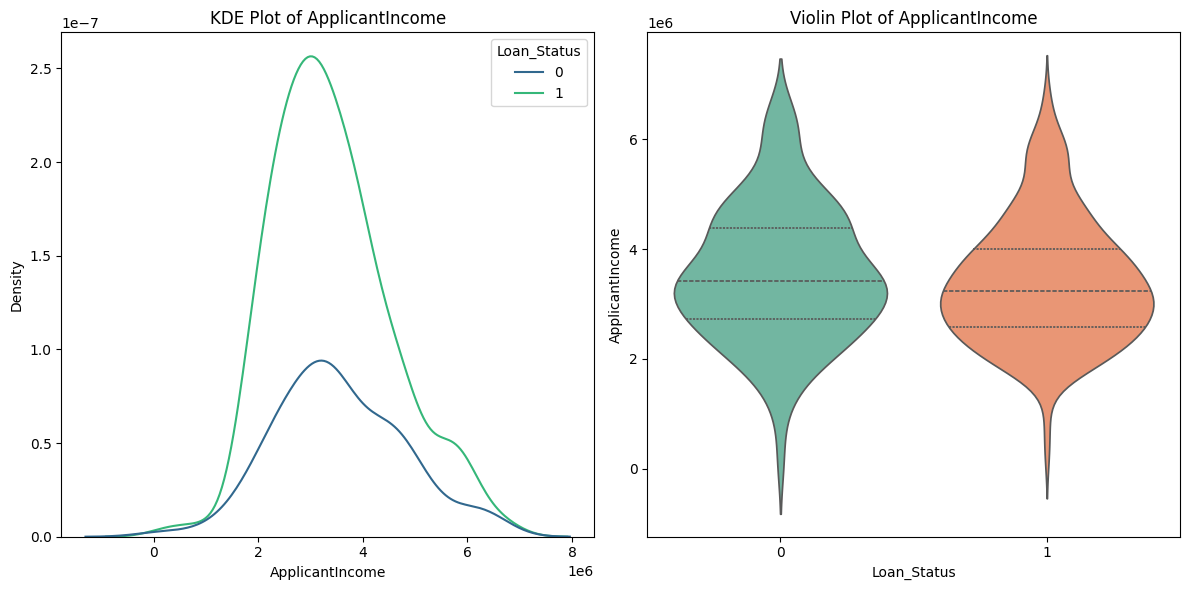

In [34]:
plot_comparison("ApplicantIncome")

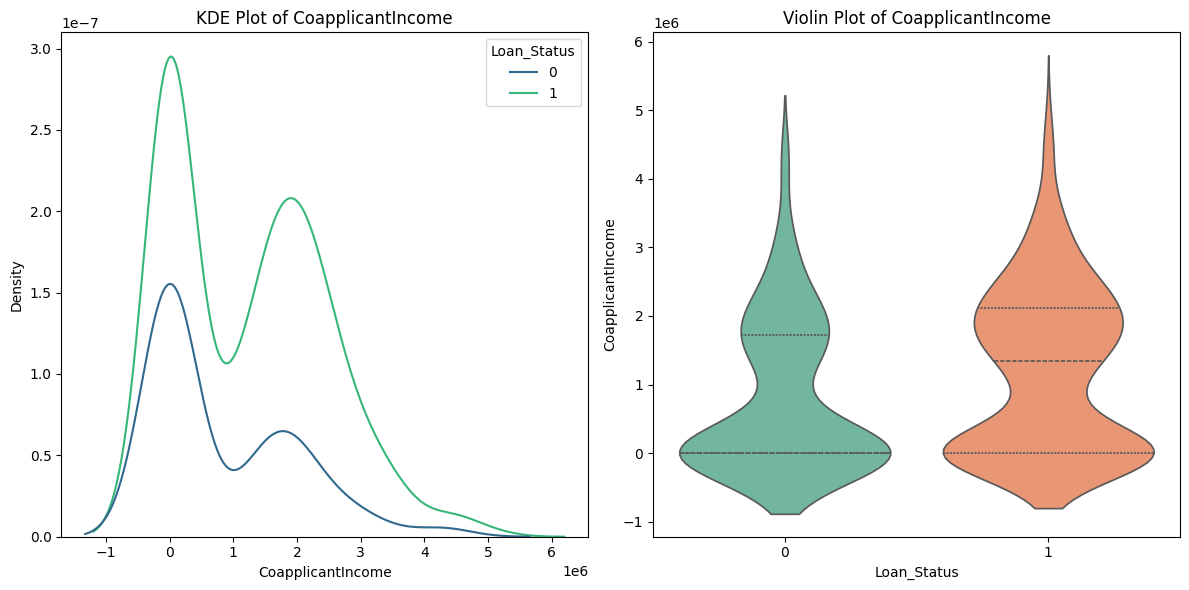

In [35]:
plot_comparison("CoapplicantIncome")

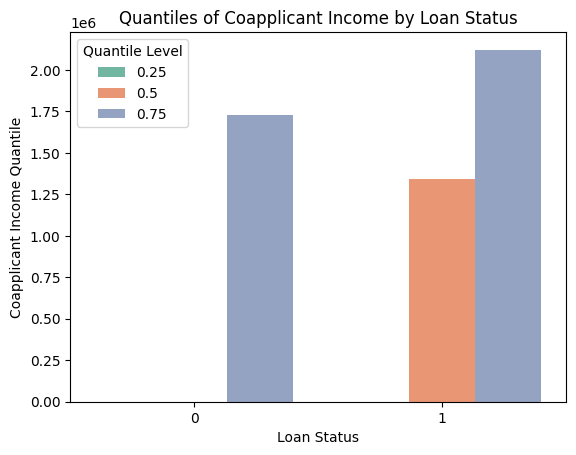

In [36]:
# Grouping by 'Loan_Status' and calculating the quantiles for 'CoapplicantIncome'
q = df.groupby(["Loan_Status"])["CoapplicantIncome"].quantile([.25, .5, .75]).reset_index(name="quantile")

# Plotting the barplot
sns.barplot(x="Loan_Status", y="quantile", hue="level_1", data=q, palette="Set2")
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income Quantile')
plt.title('Quantiles of Coapplicant Income by Loan Status')
plt.legend(title='Quantile Level')
plt.show()


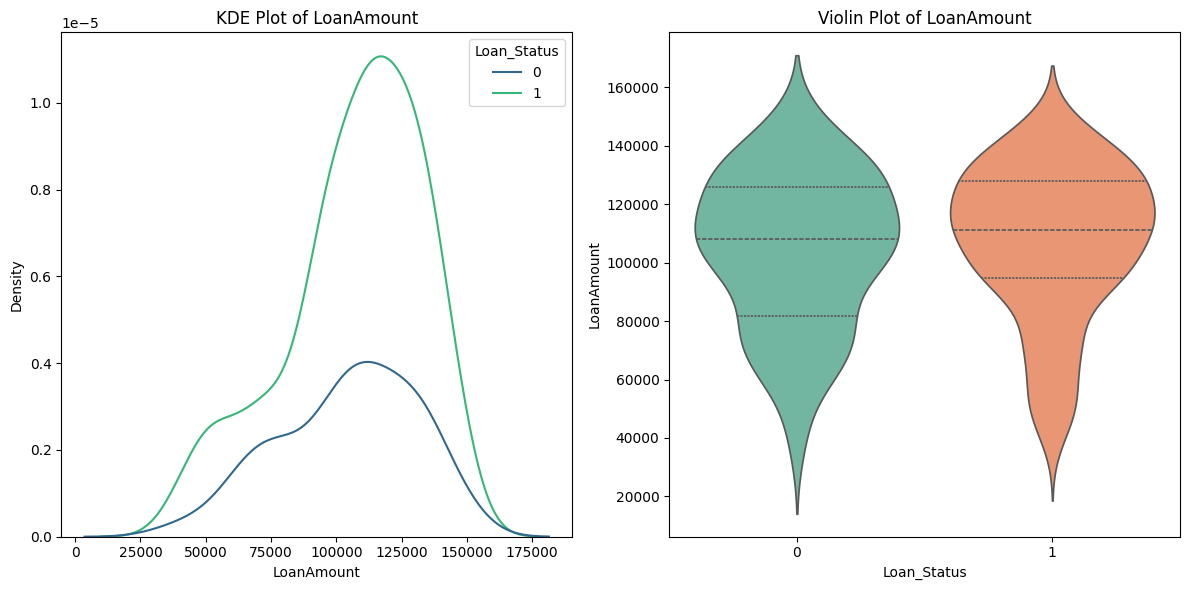

In [37]:
plot_comparison("LoanAmount")

We don't think there are any significant factors from the previous features that influence the loan status, except for CoapplicantIncome.

**Let's check the correlation coefficient between the features and the target**

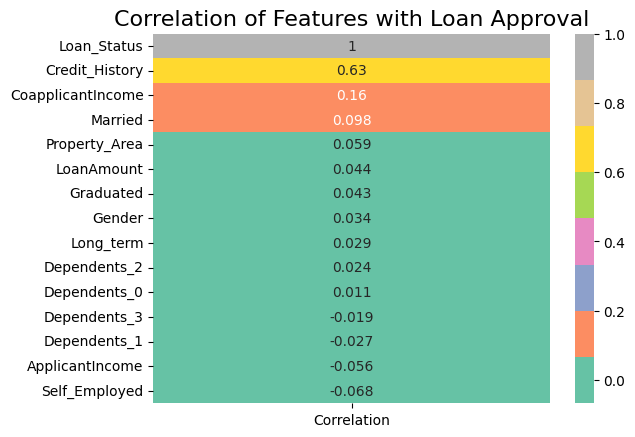

In [38]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df).astype('float')

# Calculate the correlation of each feature with the 'Loan_Status' column
corr_y = df_encoded.corrwith(df_encoded['Loan_Status'])

# Create a DataFrame to store the correlation values
corr_y_df = pd.DataFrame(corr_y, columns=['Correlation'])

# Plot a heatmap to visualize the correlation values
sns.heatmap(corr_y_df.sort_values(by='Correlation', ascending=False), annot=True, cmap='Set2')

# Set the title of the plot
plt.title('Correlation of Features with Loan Approval', fontsize=16)

# Show the plot
plt.show()



- **Credit History (0.63)**: A moderately strong positive correlation with Loan Status suggests that having a good credit history significantly increases the likelihood of loan approval.

- **Co-applicant Income (0.16)**: A positive correlation, albeit weaker, indicates that higher co-applicant income might slightly increase the chance of loan approval, but it's not as influential as credit history.

- **Property_Area_SemiUrban (0.15)**: Positive correlation suggests that living in a semi-urban area might have a slight positive impact on loan approval compared to other property areas.

- **Married (0.0098)**: A very weak positive correlation suggests that being married might have a negligible influence on loan approval in this dataset.


**Does the ratio of LoanAmount to ApplicantIncome influence the loan status?**

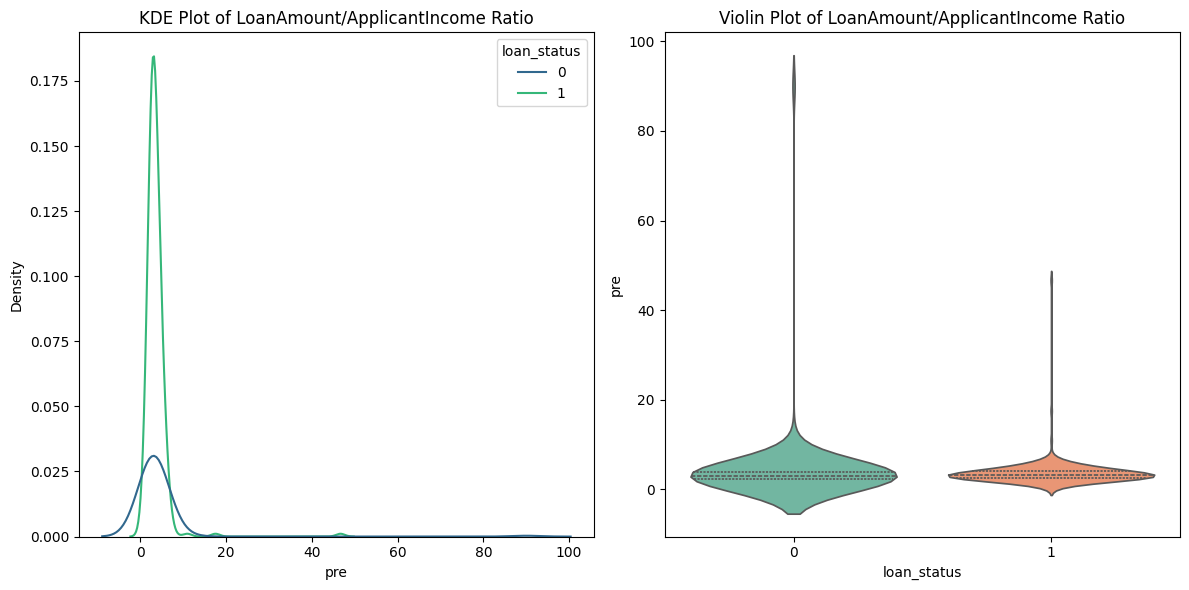

In [39]:
# Filtering the data for loan status 0
x1 = df[(df["Loan_Status"] == 0)]
# Calculating the percentage ratio of LoanAmount to ApplicantIncome
pre = (x1["LoanAmount"] / x1["ApplicantIncome"]) * 100

# Filtering the data for loan status 1
x2 = df[(df["Loan_Status"] == 1)]
# Calculating the percentage ratio of LoanAmount to ApplicantIncome
pre2 = (x2["LoanAmount"] / x2["ApplicantIncome"]) * 100

# Creating a dictionary to hold the calculated ratios and corresponding loan statuses
dic = {"pre": list(pre) + list(pre2), "loan_status": [0] * len(pre) + [1] * len(pre2)}

# Creating a new DataFrame from the dictionary
df2 = pd.DataFrame(dic)

# Creating a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting the KDE plot to visualize the distribution of the ratios by loan status
sns.kdeplot(x=df2["pre"], hue=df2["loan_status"], ax=axs[0], palette="viridis")
axs[0].set_title('KDE Plot of LoanAmount/ApplicantIncome Ratio')

# Plotting the violin plot to visualize the distribution of the ratios by loan status
sns.violinplot(x=df2["loan_status"], y=df2["pre"], ax=axs[1], inner="quartile", palette="Set2")
axs[1].set_title('Violin Plot of LoanAmount/ApplicantIncome Ratio')


# Adjusting the layout to avoid overlap
plt.tight_layout()
plt.show()


Unfortunately, we can't see any influence on the target variable here.

**Does the ratio between LoanAmount and CoApplicantIncome influence the loan status?**

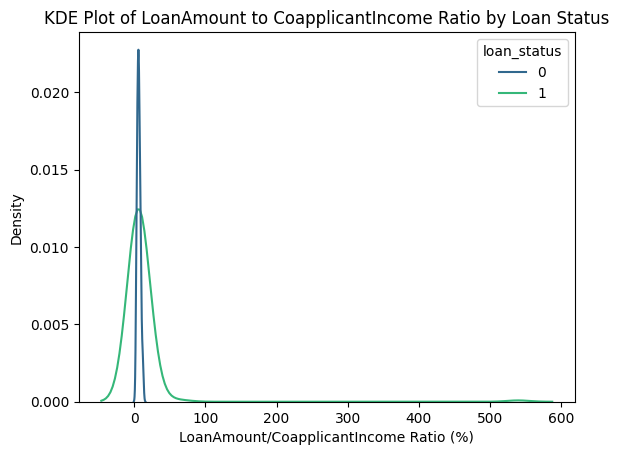

In [40]:
# Filtering the data for loan status 0 with non-zero coapplicant income
x1 = df[(df["Loan_Status"] == 0) & (df["CoapplicantIncome"] > 0)]
# Calculating the percentage ratio of LoanAmount to CoapplicantIncome
pre = (x1["LoanAmount"] / x1["CoapplicantIncome"]) * 100

# Filtering the data for loan status 1
x2 = df[(df["Loan_Status"] == 1)]
# Calculating the percentage ratio of LoanAmount to CoapplicantIncome
pre2 = (x2["LoanAmount"] / x2["CoapplicantIncome"]) * 100

# Creating a dictionary to hold the calculated ratios and corresponding loan statuses
dic = {"pre": list(pre) + list(pre2), "loan_status": [0] * len(pre) + [1] * len(pre2)}

# Creating a new DataFrame from the dictionary
df2 = pd.DataFrame(dic)

# Plotting the KDE plot to visualize the distribution of the ratios by loan status
sns.kdeplot(x=df2["pre"], hue=df2["loan_status"], palette="viridis")
plt.xlabel('LoanAmount/CoapplicantIncome Ratio (%)')
plt.ylabel('Density')
plt.title('KDE Plot of LoanAmount to CoapplicantIncome Ratio by Loan Status')
plt.show()


Unfortunately, we don't observe any impact on the target variable here.

**Does ApplicantIncome depend on Property_Area?**

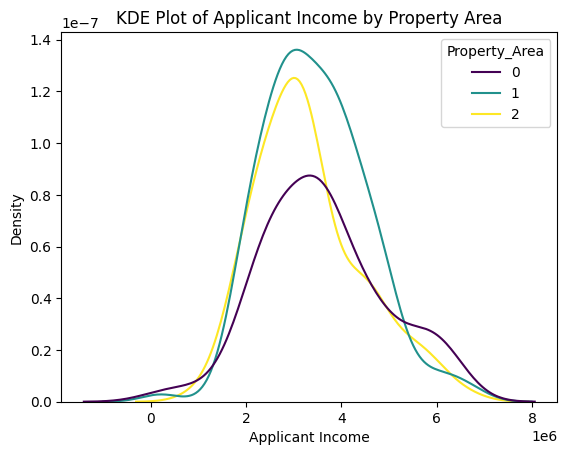

In [41]:
# Creating a KDE plot for ApplicantIncome with hue based on Property_Area
sns.kdeplot(x=df["ApplicantIncome"], hue=df["Property_Area"], palette="viridis")

# Setting the labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Density')
plt.title('KDE Plot of Applicant Income by Property Area')

# Displaying the plot
plt.show()


There is no significant influence on the target here also.



**Does the loan amount vary based on the area?**

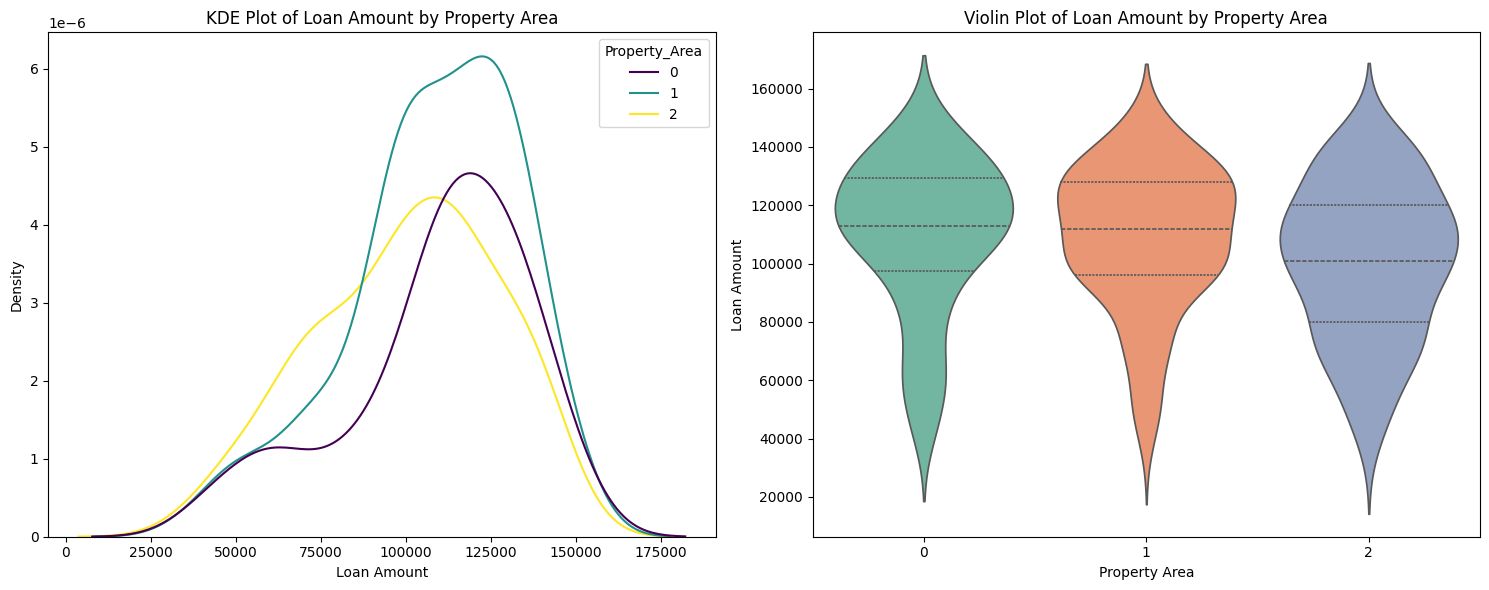

In [42]:
# Creating a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# KDE plot for LoanAmount with hue based on Property_Area
sns.kdeplot(x=df["LoanAmount"], hue=df["Property_Area"], palette="viridis", ax=axs[0])
axs[0].set_title('KDE Plot of Loan Amount by Property Area')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Density')

# Violin plot for LoanAmount with Property_Area on the x-axis
sns.violinplot(x=df["Property_Area"], y=df["LoanAmount"], inner="quartile", palette="Set2", ax=axs[1])
axs[1].set_title('Violin Plot of Loan Amount by Property Area')
axs[1].set_xlabel('Property Area')
axs[1].set_ylabel('Loan Amount')

# Adjusting the layout to avoid overlap
plt.tight_layout()

# Displaying the plots
plt.show()


It appears that applicants from rural and semiurban areas tend to take larger loan amounts compared to those from urban areas.

**Does being self-employed influence Credit History?**



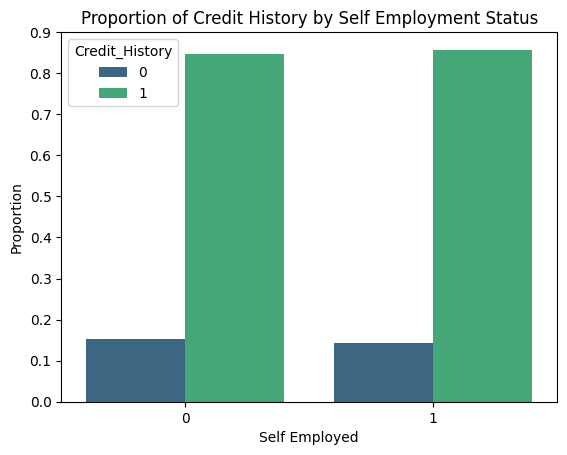

In [43]:
# Grouping by Self_Employed and Credit_History, calculating proportions, and reseting the index
p = df.groupby(["Self_Employed"])["Credit_History"].value_counts(normalize=True).reset_index(name="prop")

# Creating a bar plot to visualize the proportions
sns.barplot(x=p["Self_Employed"], y=p["prop"], hue=p["Credit_History"], palette="viridis")

# Setting the labels and title
plt.xlabel('Self Employed')
plt.ylabel('Proportion')
plt.title('Proportion of Credit History by Self Employment Status')

# Displaying the plot
plt.show()

This suggests that being self-employed does not have a noticeable influence on credit history.



**Does Credit History affect the loan amount?**

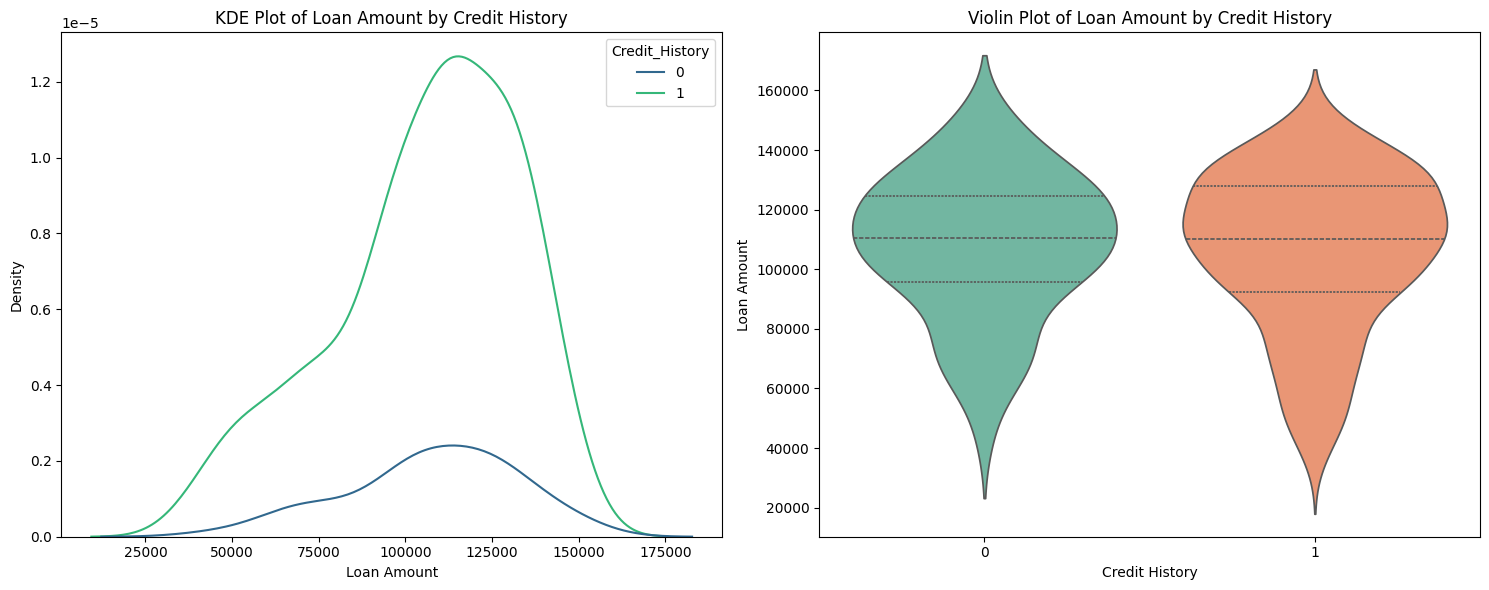

In [44]:
# Creating a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# KDE plot for LoanAmount with hue based on Credit_History
sns.kdeplot(x=df["LoanAmount"], hue=df["Credit_History"], palette="viridis", ax=axs[0])
axs[0].set_title('KDE Plot of Loan Amount by Credit History')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Density')

# Violin plot for LoanAmount with Credit_History on the x-axis
sns.violinplot(x=df["Credit_History"], y=df["LoanAmount"], inner="quartile", palette="Set2", ax=axs[1])
axs[1].set_title('Violin Plot of Loan Amount by Credit History')
axs[1].set_xlabel('Credit History')
axs[1].set_ylabel('Loan Amount')

# Adjusting the layout to avoid overlap
plt.tight_layout()

# Displaying the plots
plt.show()


It appears that there is no significant influence of Credit History on the loan amount.

**Feature Engineering**

1. Feature Scaling

In [45]:
# Feature Scaling
scaler = StandardScaler()

# Columns to scale
scale_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# Scaling the numerical columns
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Displaying the scaled columns
df[scale_cols]

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.981917,0.325023,0.832337
1,-0.383708,-0.939203,-1.526667
2,-0.743447,1.037617,0.527949
3,2.204338,-0.939203,1.326966
4,-0.959117,0.331730,-0.423262
...,...,...,...
376,1.948121,-0.939203,0.832337
377,-0.183566,0.695572,0.071368
378,-0.469976,-0.939203,-1.336425
379,0.570418,-0.939203,-2.515926


**Model Selection**

1. Splitting the Dataset

In [47]:
# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Defining the Models

In [48]:
# Defining the models to experiment with
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

3. Evaluating the Models

In [49]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Evaluating each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")
    evaluate_model(model, X_train, y_train, X_test, y_test)


Evaluating Logistic Regression
Accuracy: 0.8873
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.86      1.00      0.93        50

    accuracy                           0.89        71
   macro avg       0.93      0.81      0.85        71
weighted avg       0.90      0.89      0.88        71

Confusion Matrix:
[[13  8]
 [ 0 50]]

Evaluating Random Forest
Accuracy: 0.9155
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.89      1.00      0.94        50

    accuracy                           0.92        71
   macro avg       0.95      0.86      0.89        71
weighted avg       0.92      0.92      0.91        71

Confusion Matrix:
[[15  6]
 [ 0 50]]

Evaluating Gradient Boosting
Accuracy: 0.8451
Classification Report:
              precision    recall  f1-score   support

         

### Logistic Regression

**Accuracy**: 0.8873 (88.73%)

**Classification Report**:
- **Precision**:
  - Class 0 (Not Approved): 1.00
  - Class 1 (Approved): 0.86
- **Recall**:
  - Class 0: 0.62
  - Class 1: 1.00
- **F1-Score**:
  - Class 0: 0.76
  - Class 1: 0.93

**Confusion Matrix**:
- True Positives (TP) for Class 1: 50
- True Negatives (TN) for Class 0: 13
- False Positives (FP) for Class 0: 8
- False Negatives (FN) for Class 1: 0

**Explanation**:
- Logistic Regression has high precision for Class 0 but a lower recall, indicating that while it accurately predicts non-approval when it does, it misses a significant number of actual non-approvals.
- Class 1 (Approved) has perfect recall, meaning all actual approvals are correctly identified, but with some false positives.
- Overall accuracy is high at 88.73%.







### Random Forest

**Accuracy**: 0.8732 (87.32%)

**Classification Report**:
- **Precision**:
  - Class 0: 0.93
  - Class 1: 0.86
- **Recall**:
  - Class 0: 0.62
  - Class 1: 0.98
- **F1-Score**:
  - Class 0: 0.74
  - Class 1: 0.92

**Confusion Matrix**:
- TP for Class 1: 49
- TN for Class 0: 13
- FP for Class 0: 8
- FN for Class 1: 1

**Explanation**:
- Random Forest shows a balanced performance with good precision and recall for both classes.
- Slightly lower accuracy than Logistic Regression, but the model correctly identifies a high number of true approvals with minimal false negatives.
- High precision for Class 0, but similar recall issues as Logistic Regression.

### Gradient Boosting

**Accuracy**: 0.8310 (83.10%)

**Classification Report**:
- **Precision**:
  - Class 0: 0.71
  - Class 1: 0.88
- **Recall**:
  - Class 0: 0.71
  - Class 1: 0.88
- **F1-Score**:
  - Class 0: 0.71
  - Class 1: 0.88

**Confusion Matrix**:
- TP for Class 1: 44
- TN for Class 0: 15
- FP for Class 0: 6
- FN for Class 1: 6

**Explanation**:
- Gradient Boosting has lower overall accuracy compared to Logistic Regression and Random Forest.
- Balanced precision and recall for both classes, indicating a trade-off between precision and recall.
- Predicts fewer false negatives than the previous models but at the cost of slightly lower overall accuracy.

### Support Vector Machine (SVM)

**Accuracy**: 0.8873 (88.73%)

**Classification Report**:
- **Precision**:
  - Class 0: 1.00
  - Class 1: 0.86
- **Recall**:
  - Class 0: 0.62
  - Class 1: 1.00
- **F1-Score**:
  - Class 0: 0.76
  - Class 1: 0.93

**Confusion Matrix**:
- TP for Class 1: 50
- TN for Class 0: 13
- FP for Class 0: 8
- FN for Class 1: 0

**Explanation**:
- SVM has the same accuracy as Logistic Regression, with similar precision, recall, and F1-scores.
- Perfect recall for Class 1 and high precision for Class 0, indicating that it effectively identifies approvals but also has some false positives for non-approvals.

### Overall Comparison

- **Logistic Regression and SVM**: Both have the highest accuracy (88.73%) with similar performance metrics. They are good at identifying approved loans but miss some non-approved ones.
- **Random Forest**: Slightly lower accuracy (87.32%) but provides a good balance between precision and recall for both classes. It also has fewer false negatives.
- **Gradient Boosting**: Lowest accuracy (83.10%) but balanced precision and recall, suggesting a good trade-off between false positives and false negatives.


**Conclusion**:
- **Logistic Regression and SVM** are the best performers with the highest accuracy. However, they both have the issue of high false positives for non-approval cases.
- **Random Forest** provides a balanced performance with good precision and recall but slightly lower accuracy.
- **Gradient Boosting** is less accurate but offers balanced performance, making it useful if a balance between false positives and false negatives is needed.


**Hyperparameter Tuning**

1. Defining the Parameter Grid

In [50]:
# Defining the parameter grid for each model
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}


2. Performing Grid Search

The grid search process involved tuning the hyperparameters for each model to find the best set of parameters that maximize the model's performance. After identifying the best parameters, each model was evaluated again to determine its performance.

In [51]:
# Function to perform grid search
def grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Performing grid search for each model
best_models = {}
for model_name, model in models.items():
    print(f"\nPerforming Grid Search for {model_name}")
    best_model = grid_search(model, param_grid[model_name], X_train, y_train)
    best_models[model_name] = best_model
    print(f"\nEvaluating Best {model_name}")
    evaluate_model(best_model, X_train, y_train, X_test, y_test)



Performing Grid Search for Logistic Regression
Best Parameters: {'C': 1, 'solver': 'liblinear'}

Evaluating Best Logistic Regression
Accuracy: 0.8873
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.86      1.00      0.93        50

    accuracy                           0.89        71
   macro avg       0.93      0.81      0.85        71
weighted avg       0.90      0.89      0.88        71

Confusion Matrix:
[[13  8]
 [ 0 50]]

Performing Grid Search for Random Forest
Best Parameters: {'max_depth': 10, 'n_estimators': 200}

Evaluating Best Random Forest
Accuracy: 0.9014
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        21
           1       0.88      1.00      0.93        50

    accuracy                           0.90        71
   macro avg       0.94      0.83      0.87        71
weighted avg       0.


### Logistic Regression

**Best Parameters**: `{'C': 1, 'solver': 'liblinear'}`

**Accuracy**: 0.8873 (88.73%)

**Classification Report**:
- **Precision**:
  - Class 0 (Not Approved): 1.00
  - Class 1 (Approved): 0.86
- **Recall**:
  - Class 0: 0.62
  - Class 1: 1.00
- **F1-Score**:
  - Class 0: 0.76
  - Class 1: 0.93

**Confusion Matrix**:
- True Positives (TP) for Class 1: 50
- True Negatives (TN) for Class 0: 13
- False Positives (FP) for Class 0: 8
- False Negatives (FN) for Class 1: 0

**Explanation**:
- Logistic Regression with the best parameters (`C=1` and `solver='liblinear'`) achieved an accuracy of 88.73%.
- The precision for Class 0 is perfect, meaning all predicted non-approvals were actual non-approvals.
- However, the recall for Class 0 is 0.62, indicating that it missed 38% of the actual non-approvals.
- For Class 1, the model has perfect recall, meaning it identified all actual approvals correctly.








### Random Forest

**Best Parameters**: `{'max_depth': 10, 'n_estimators': 200}`

**Accuracy**: 0.9014 (90.14%)

**Classification Report**:
- **Precision**:
  - Class 0: 1.00
  - Class 1: 0.88
- **Recall**:
  - Class 0: 0.67
  - Class 1: 1.00
- **F1-Score**:
  - Class 0: 0.80
  - Class 1: 0.93

**Confusion Matrix**:
- TP for Class 1: 50
- TN for Class 0: 14
- FP for Class 0: 7
- FN for Class 1: 0

**Explanation**:
- Random Forest with the best parameters (`max_depth=10` and `n_estimators=200`) achieved a slightly higher accuracy of 90.14%.
- Precision and recall for Class 0 improved compared to Logistic Regression, resulting in a higher F1-score for Class 0.
- The model has perfect recall for Class 1 and improved overall accuracy, indicating that the hyperparameter tuning effectively enhanced its performance.


### Gradient Boosting

**Best Parameters**: `{'learning_rate': 0.01, 'n_estimators': 100}`

**Accuracy**: 0.8732 (87.32%)

**Classification Report**:
- **Precision**:
  - Class 0: 0.93
  - Class 1: 0.86
- **Recall**:
  - Class 0: 0.62
  - Class 1: 0.98
- **F1-Score**:
  - Class 0: 0.74
  - Class 1: 0.92

**Confusion Matrix**:
- TP for Class 1: 49
- TN for Class 0: 13
- FP for Class 0: 8
- FN for Class 1: 1

**Explanation**:
- Gradient Boosting with the best parameters (`learning_rate=0.01` and `n_estimators=100`) achieved an accuracy of 87.32%.
- Precision and recall for Class 0 are lower compared to the tuned Random Forest model.
- The model shows good performance for Class 1 with high precision and recall but has some misclassifications in Class 0.


### Support Vector Machine (SVM)

**Best Parameters**: `{'C': 0.1, 'kernel': 'linear'}`

**Accuracy**: 0.8873 (88.73%)

**Classification Report**:
- **Precision**:
  - Class 0: 1.00
  - Class 1: 0.86
- **Recall**:
  - Class 0: 0.62
  - Class 1: 1.00
- **F1-Score**:
  - Class 0: 0.76
  - Class 1: 0.93

**Confusion Matrix**:
- TP for Class 1: 50
- TN for Class 0: 13
- FP for Class 0: 8
- FN for Class 1: 0

**Explanation**:
- SVM with the best parameters (`C=0.1` and `kernel='linear'`) achieved the same accuracy as Logistic Regression (88.73%).
- The performance metrics are similar to those of Logistic Regression, with perfect precision for Class 0 and perfect recall for Class 1.
- The confusion matrix shows the same distribution of misclassifications as Logistic Regression.

### Overall Comparison After Grid Search

- **Logistic Regression and SVM**: Both have the same accuracy and similar performance metrics. They both perfectly identify Class 1 (approvals) but miss some Class 0 (non-approvals).
- **Random Forest**: Achieved the highest accuracy (90.14%) after tuning. It offers a good balance with improved precision and recall for both classes.
- **Gradient Boosting**: Lower accuracy compared to Random Forest but still performs well, especially for Class 1. It has more misclassifications in Class 0.


### Conclusion

- **Best Model**: The tuned Random Forest model (`max_depth=10` and `n_estimators=200`) performs the best overall, with the highest accuracy (90.14%) and balanced precision and recall for both classes.
- **Runner-ups**: Logistic Regression and SVM, both with accuracy of 88.73%, perform well but have issues with false positives in Class 0.
- **Considerations**: Depending on the specific needs, such as the importance of minimizing false positives or maximizing overall accuracy, the choice of model may vary. Random Forest offers a balanced approach, making it a strong candidate for deployment.

##**Deep Learning Techniques**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Dense, Dropout
from sklearn.preprocessing import StandardScaler

###**Feedforward Neural Network (FNN)**

In [53]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [54]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.head())

     Gender  Married Dependents  Graduated  Self_Employed  ApplicantIncome  \
379       1        1          3          1              0         0.570418   
216       1        1          3          0              0        -0.234464   
370       1        0          0          1              0         1.125985   
195       0        0          0          1              0        -0.901317   
81        0        0          0          1              0         0.213268   

     CoapplicantIncome  LoanAmount  Long_term  Credit_History  Property_Area  
379          -0.939203   -2.515926          0               1              0  
216          -0.939203   -1.222279          1               1              1  
370          -0.939203   -0.461310          1               1              1  
195           0.622636   -0.080826          1               0              2  
81           -0.939203   -0.499359          1               1              0  


In [56]:
# Defining the FNN model
fnn_model = Sequential()
fnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
fnn_model.add(Dropout(0.5))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dropout(0.5))
fnn_model.add(Dense(1, activation='sigmoid'))


In [57]:
# Compiling the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Training the model
fnn_history = fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4465 - loss: 0.7703 - val_accuracy: 0.4366 - val_loss: 0.7053
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5045 - loss: 0.7614 - val_accuracy: 0.6761 - val_loss: 0.6454
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6182 - loss: 0.6764 - val_accuracy: 0.7042 - val_loss: 0.6160
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6374 - loss: 0.6942 - val_accuracy: 0.7042 - val_loss: 0.6067
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6262 - loss: 0.6839 - val_accuracy: 0.7042 - val_loss: 0.6009
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6785 - loss: 0.6042 - val_accuracy: 0.7042 - val_loss: 0.5971
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7071 - loss: 0.6699 - val_accuracy: 0.7042 - val_loss: 0.5939
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6978 - loss: 0.6197 - val_accuracy: 0.7042 - val_loss: 0.5905
Epoch 9

In [59]:
# Evaluating the model
loss, accuracy = fnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.4694 
Test Accuracy: 0.8028169274330139
Test Loss: 0.4826202988624573


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting on the test set
y_pred = (fnn_model.predict(X_test) > 0.5).astype(int)

# Printing classification report
print(classification_report(y_test, y_pred))

# Printing confusion matrix
print(confusion_matrix(y_test, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.79      0.98      0.87        50

    accuracy                           0.80        71
   macro avg       0.84      0.68      0.70        71
weighted avg       0.82      0.80      0.77        71

[[ 8 13]
 [ 1 49]]


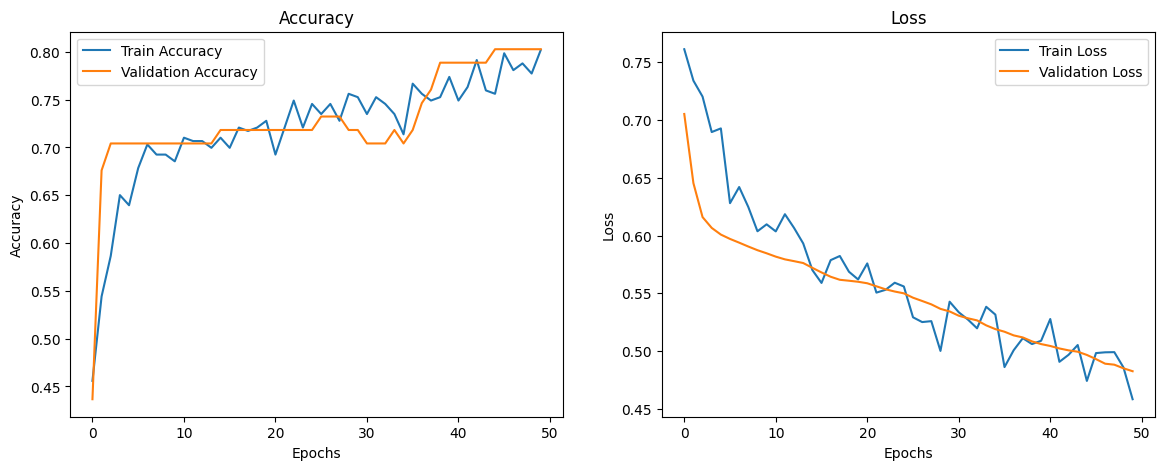

In [61]:
# Plotting accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(fnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(fnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(fnn_history.history['loss'], label='Train Loss')
plt.plot(fnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###**Recurrent Neural Network (RNN)**

In [63]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Reshaping data for SimpleRNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [65]:
# Defining the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [66]:
# Training the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6595 - loss: 0.5908 - val_accuracy: 0.8451 - val_loss: 0.4939
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8644 - loss: 0.4723 - val_accuracy: 0.8873 - val_loss: 0.4026
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8324 - loss: 0.4219 - val_accuracy: 0.8873 - val_loss: 0.3669
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8524 - loss: 0.3930 - val_accuracy: 0.8873 - val_loss: 0.3583
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8417 - loss: 0.4124 - val_accuracy: 0.8732 - val_loss: 0.3555
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8434 - loss: 0.3893 - val_accuracy: 0.8873 - val_loss: 0.3498
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8369 - loss: 0.4093 - val_accuracy: 0.8873 - val_loss: 0.3478
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8446 - loss: 0.3908 - val_accuracy: 0.8873 - val_loss: 0.3441


In [67]:
# Evaluating the model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8522 - loss: 0.3297 
Test Accuracy: 0.8450704216957092
Test Loss: 0.334756076335907


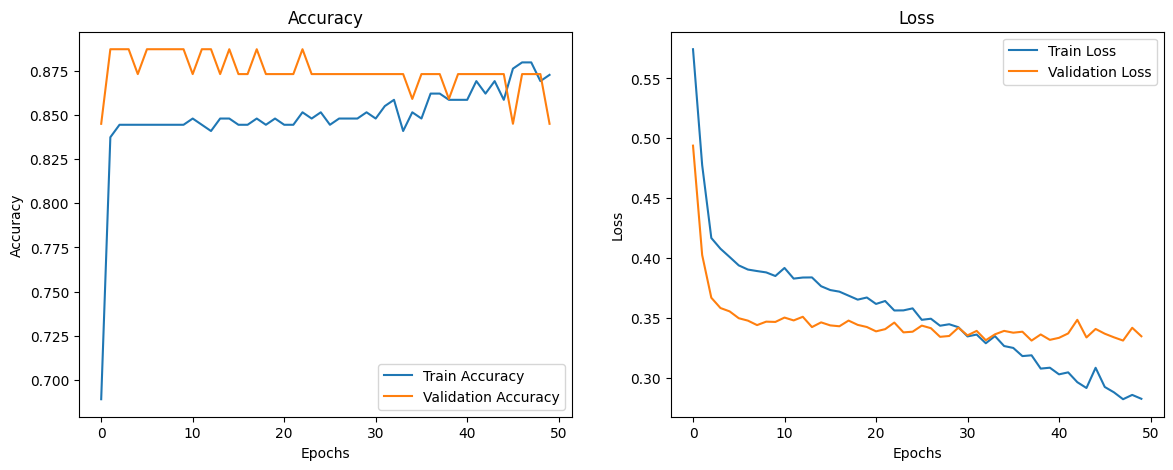

In [68]:
# Plotting accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###**Gated Recurrent Unit (GRU)**

In [69]:
# Defining the model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshaping data for GRU
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [70]:
# Training the model
gru_history = gru_model.fit(X_train_gru, y_train, epochs=50, batch_size=32, validation_data=(X_test_gru, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7164 - loss: 0.6548 - val_accuracy: 0.7746 - val_loss: 0.6448
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7728 - loss: 0.6200 - val_accuracy: 0.7746 - val_loss: 0.6092
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7714 - loss: 0.5867 - val_accuracy: 0.7746 - val_loss: 0.5730
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7605 - loss: 0.5426 - val_accuracy: 0.7746 - val_loss: 0.5449
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7577 - loss: 0.5143 - val_accuracy: 0.7746 - val_loss: 0.5365
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7589 - loss: 0.5018 - val_accuracy: 0.7746 - val_loss: 0.5327
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7939 - loss: 0.5082 - val_accuracy: 0.7746 - val_loss: 0.5294
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8082 - loss: 0.5030 - val_accuracy: 0.7746 - val_loss: 0.5228


In [71]:
# Evaluating the model
loss, accuracy = gru_model.evaluate(X_test_gru, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8929 - loss: 0.3411 
Test Accuracy: 0.8873239159584045
Test Loss: 0.35870566964149475


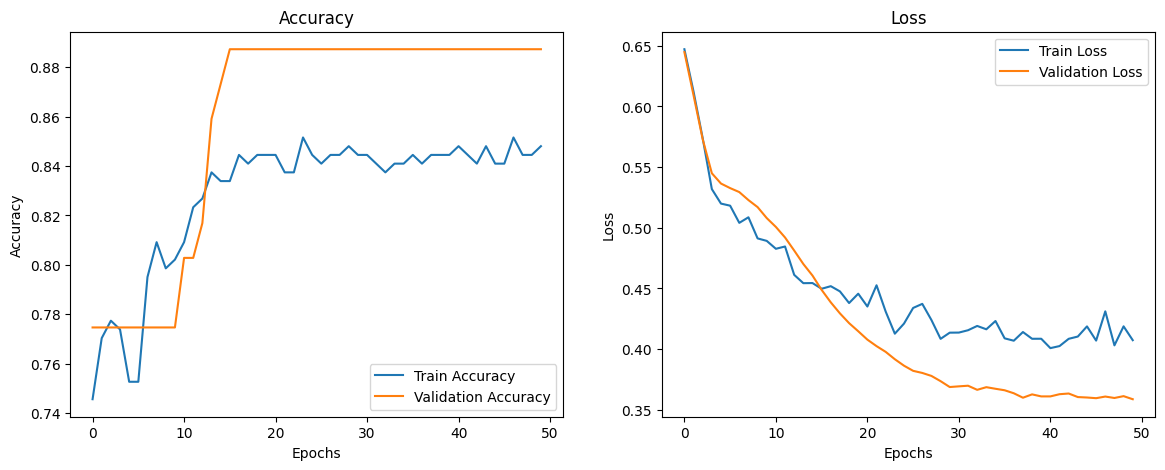

In [72]:
# Plotting accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Train Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Model Performance Summary:

1. **Fully Connected Neural Network (FNN)**
   - **Test Accuracy:** 0.803
   - **Test Loss:** 0.483

2. **Recurrent Neural Network (RNN)**
   - **Test Accuracy:** 0.845
   - **Test Loss:** 0.335

3. **Gated Recurrent Unit (GRU)**
   - **Test Accuracy:** 0.887
   - **Test Loss:** 0.359


**Overall Analysis:**
   - **GRU Model:** Despite the slightly higher loss, the GRU model shows the best accuracy, making it the most reliable model for predictions in this scenario. GRU's ability to manage vanishing gradients better than RNNs likely contributed to its superior performance.
   - **RNN Model:** The RNN shows a good balance between low loss and high accuracy, making it a strong contender if computational simplicity or faster training is prioritized.
   - **FNN Model:** The FNN model performed the least well, likely because it lacks the ability to capture temporal dependencies in sequential data, which are better handled by RNNs and GRUs.



In [77]:
gru_model.save('loan_status_model.h5')